In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**LOADING DATASET**

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/IBM/abalone.csv")

In [ ]:
dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
dataset.shape

(10000, 14)

**PERFORMING VISUALIZATIONS**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

UNIVARIATE ANALYSIS

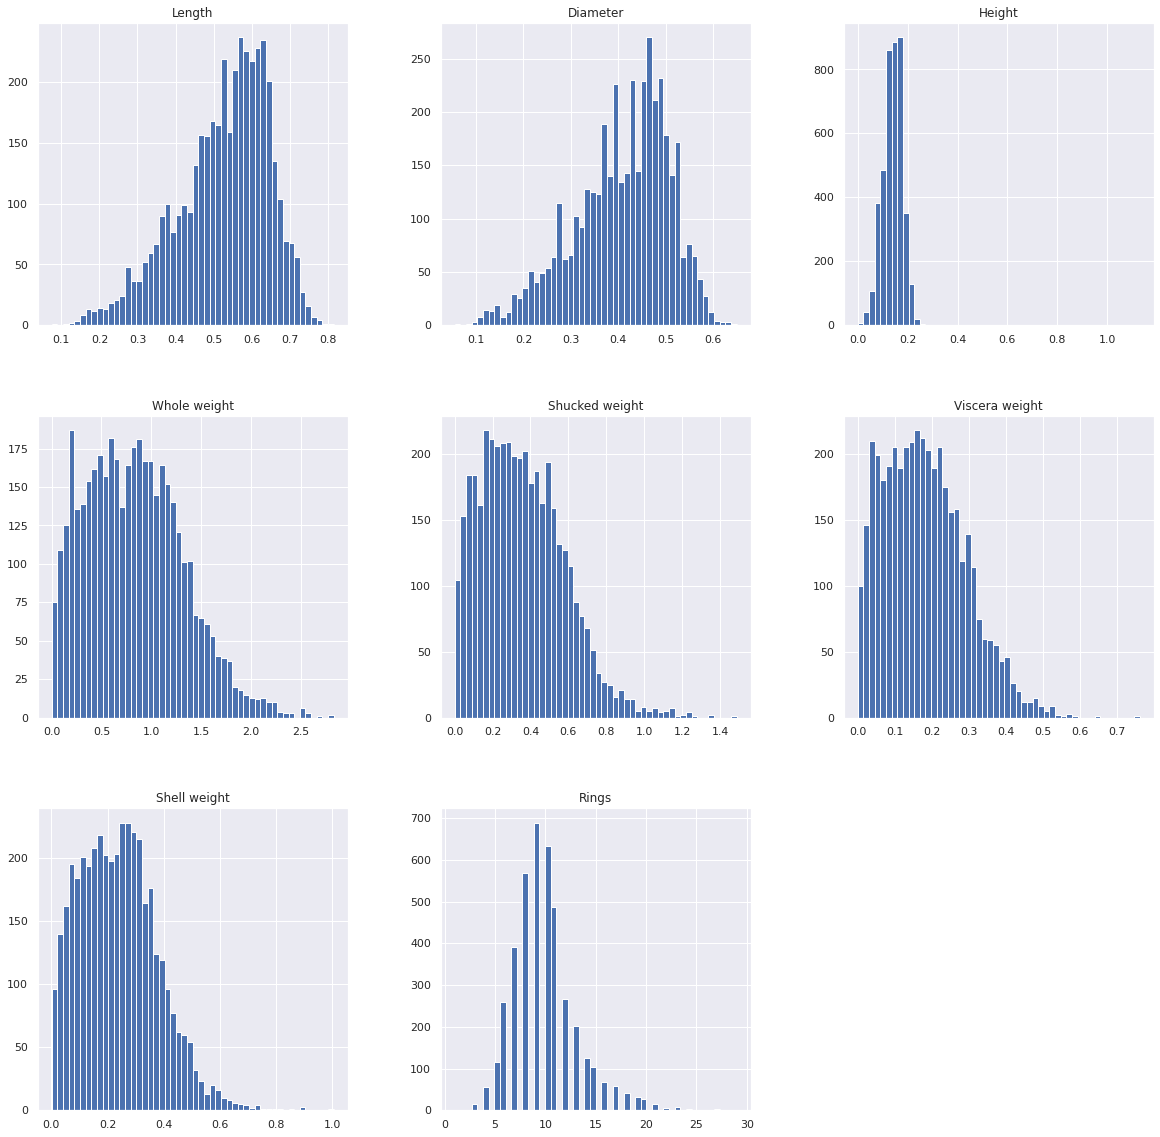

In [28]:
dataset.hist(figsize=(20,20),column=['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'],bins=50)
plt.show()

**BIVARIATE ANALYSIS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


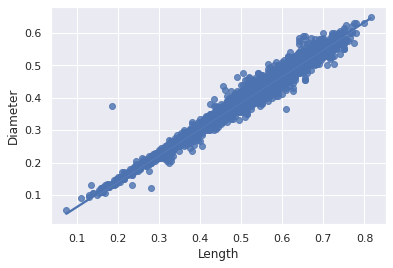

In [26]:
# Length and Diameter
sns.regplot(dataset['Length'],dataset['Diameter'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


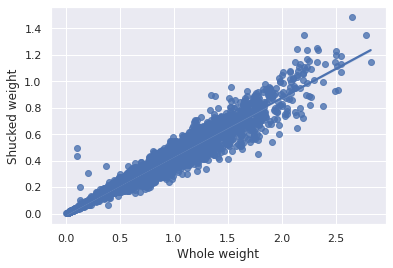

In [27]:
# Whole weight and Shucked weight
sns.regplot(dataset['Whole weight'],dataset['Shucked weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


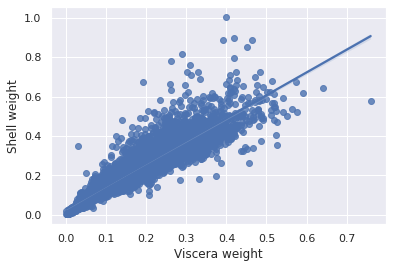

In [29]:
# Viscera weight and Shell weight
sns.regplot(dataset['Viscera weight'],dataset['Shell weight'])

MULTIVARIATE ANALYSIS

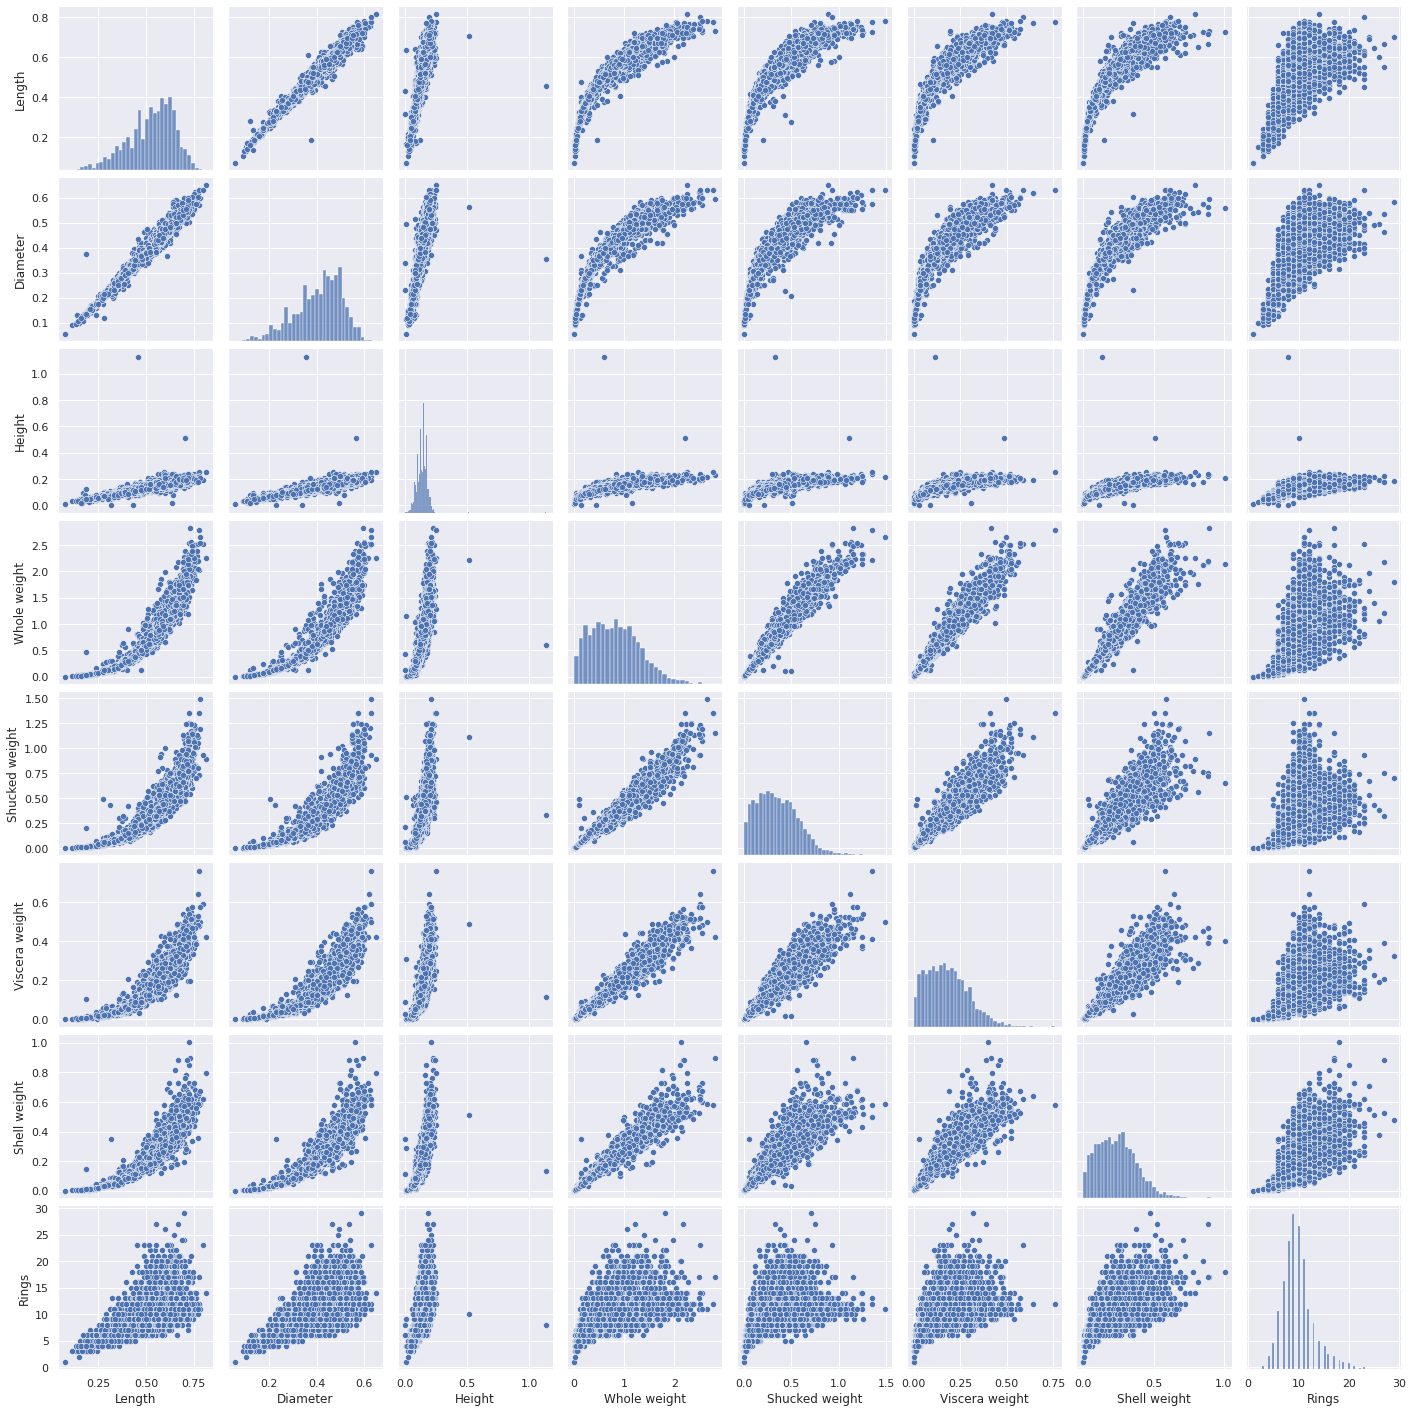

In [31]:
sns.pairplot(data=dataset.drop(columns=['Sex']))

**PERFORM DESCRIPTIVE STATISTICS**

In [32]:
dataset.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


**HANDLE MISSING VALUES**

In [ ]:
dataset.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [ ]:
# no missing values

**FINDING OUTLIERS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

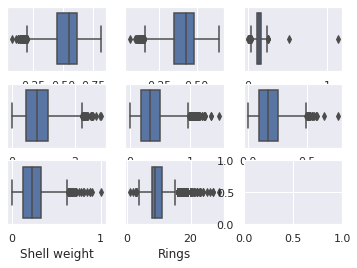

In [ ]:
sns.set()

fig,axes=plt.subplots(3,3)

sns.boxplot(dataset['Length'],ax=axes[0,0])
sns.boxplot(dataset['Diameter'],ax=axes[0,1])
sns.boxplot(dataset['Height'],ax=axes[0,2])
sns.boxplot(dataset['Whole weight'],ax=axes[1,0])
sns.boxplot(dataset['Shucked weight'],ax=axes[1,1])
sns.boxplot(dataset['Viscera weight'],ax=axes[1,2])
sns.boxplot(dataset['Shell weight'],ax=axes[2,0])
sns.boxplot(dataset['Rings'],ax=axes[2,1])

In [34]:
# outliers in CreditScore,Age,NumOfProduts

**REPLACING OUTLIERS**

In [35]:
qnt=dataset.quantile(q=[0.25,0.75])
IQR=qnt.loc[0.75]-qnt.loc[0.25]

In [36]:
# upper_extreme and lower_extreme
upper_extreme=qnt.loc[0.75]+1.5*IQR
lower_extreme=qnt.loc[0.25]-1.5*IQR

In [38]:
# replacing for Length
dataset['Length']=np.where(dataset['Length']>upper_extreme['Length'],dataset['Length'].median(),dataset['Length'])
dataset['Length']=np.where(dataset['Length']<lower_extreme['Length'],dataset['Length'].median(),dataset['Length'])

# replacing for Diameter 
dataset['Diameter']=np.where(dataset['Diameter']>upper_extreme['Diameter'],dataset['Diameter'].median(),dataset['Diameter'])
dataset['Diameter']=np.where(dataset['Diameter']<lower_extreme['Diameter'],dataset['Diameter'].median(),dataset['Diameter'])

# replacing for Height
dataset['Height']=np.where(dataset['Height']>upper_extreme['Height'],dataset['Height'].median(),dataset['Height'])
dataset['Height']=np.where(dataset['Height']<lower_extreme['Height'],dataset['Height'].median(),dataset['Height'])

# replacing for whole weight
dataset['Whole weight']=np.where(dataset['Whole weight']>upper_extreme['Whole weight'],dataset['Whole weight'].median(),dataset['Whole weight'])
dataset['Whole weight']=np.where(dataset['Whole weight']<lower_extreme['Whole weight'],dataset['Whole weight'].median(),dataset['Whole weight'])

# replacing for Shucked weight
dataset['Shucked weight']=np.where(dataset['Shucked weight']>upper_extreme['Shucked weight'],dataset['Shucked weight'].median(),dataset['Shucked weight'])
dataset['Shucked weight']=np.where(dataset['Shucked weight']<lower_extreme['Shucked weight'],dataset['Shucked weight'].median(),dataset['Shucked weight'])

# replacing for viscera weight
dataset['Viscera weight']=np.where(dataset['Viscera weight']>upper_extreme['Viscera weight'],dataset['Viscera weight'].median(),dataset['Viscera weight'])
dataset['Viscera weight']=np.where(dataset['Viscera weight']<lower_extreme['Viscera weight'],dataset['Viscera weight'].median(),dataset['Viscera weight'])

# replacing for Shell weight
dataset['Shell weight']=np.where(dataset['Shell weight']>upper_extreme['Shell weight'],dataset['Shell weight'].median(),dataset['Shell weight'])
dataset['Shell weight']=np.where(dataset['Shell weight']<lower_extreme['Shell weight'],dataset['Shell weight'].median(),dataset['Shell weight'])

# replacing for Rings
dataset['Rings']=np.where(dataset['Rings']>upper_extreme['Rings'],dataset['Rings'].median(),dataset['Rings'])
dataset['Rings']=np.where(dataset['Rings']<lower_extreme['Rings'],dataset['Rings'].median(),dataset['Rings'])

**ENCODING FOR CATEGORICAL COLUMNS**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
dataset['Sex']=le.fit_transform(dataset['Sex'])

In [ ]:
dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**SPLITING DATA INTO DEPENDENT AND INDEPENDENT VARIABLES**

In [ ]:
y=dataset['Rings'] # dependent variables
x=dataset.drop(columns=['Rings']) # independent variables

**SCALING THE INDEPENDENT VARIABLES**

In [ ]:
from sklearn.preprocessing import scale

names=x.columns
x=scale(x)
x=pd.DataFrame(x,columns=names)

In [ ]:
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.151980,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,1.151980,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,-1.280690,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,1.151980,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-0.064355,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757


**SPLITTING DATA INTO TRAIN AND TEST**

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [40]:
#model building
from sklearn. neighbors import KNeighborsClassifier
model =KNeighborsClassifier()


In [58]:
#training model
model.fit(x_train,y_train)

KNeighborsClassifier()

In [42]:
x_train.shape

(3341, 8)

In [43]:
x_test.shape

(836, 8)

In [45]:
#testing model
y_pred = model.predict(x_test)
y_pred

array([ 6, 11,  9,  7,  9,  8,  7, 10,  8, 10,  7,  4,  9,  9,  9,  9,  5,
        9, 10, 10, 11, 10, 11, 11, 10, 11, 10, 10,  8,  9,  7,  5, 11, 15,
       11,  8,  9,  7,  9, 11,  6,  9,  9,  9,  8,  5,  6,  7,  6,  8,  9,
        4, 10, 10,  5,  7, 11,  6, 10,  8,  7,  8,  4,  9, 12,  8,  9,  8,
       11, 11,  9,  9, 10,  8, 12,  8,  8, 10,  6,  5,  9,  4,  8, 10,  6,
        9, 12,  8, 11,  8, 10, 11,  9,  9,  9, 13,  9,  7, 10,  9,  6,  7,
        8, 11, 10,  9,  7, 10,  9,  8, 12,  8, 10,  8, 10,  8,  7, 10, 10,
        8,  9,  7, 10,  9, 11,  7,  8, 16,  8, 10,  8,  7,  6, 11,  8,  7,
       13,  8, 12, 10, 14,  9, 12, 12,  8,  9,  9,  6,  9,  6, 10,  8,  7,
        6, 10, 11,  6,  9,  9,  9,  6,  8,  9,  8,  8, 10, 12, 10,  8, 10,
        9,  9,  9,  9, 13,  7,  8, 10, 12,  6,  9,  8,  7,  9,  7,  9,  7,
       11,  7,  5, 10,  9,  6,  6,  5,  8, 15,  9,  7,  9,  9,  7, 12, 10,
       12, 11,  6,  9,  6,  8,  9,  7,  7, 10,  4,  9,  6, 10,  8, 11, 10,
       12,  7,  9, 11, 11

In [46]:
#model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [54]:
print('Training accuracy: ',accuracy_score(y_test,y_pred))

Training accuracy:  0.20454545454545456


In [55]:
print('Testing accuracy: ',accuracy_score(y_test,y_pred))

Testing accuracy:  0.20454545454545456


measuring performance of matrix

In [56]:
pd.crosstab(y_test,y_pred)

col_0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Rings,,,,,,,,,,,,,,,,,
3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,7,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,2,6,5,8,2,0,0,0,0,0,0,0,0,0,0,0
6,0,0,8,11,20,5,1,0,1,0,0,0,0,0,0,0,0
7,0,3,2,27,22,21,7,1,0,0,0,0,0,0,0,0,0
8,0,0,1,9,23,32,34,15,6,1,1,0,0,0,0,0,0
9,0,0,1,5,11,29,35,32,13,5,4,0,1,1,0,0,0
10,0,0,0,4,7,21,41,26,15,7,2,0,2,0,0,0,0
11,0,0,0,2,6,7,30,32,22,4,2,0,0,0,0,0,0


In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       1.00      0.33      0.50         3
           4       0.50      0.58      0.54        12
           5       0.29      0.26      0.27        23
           6       0.17      0.24      0.20        46
           7       0.21      0.27      0.24        83
           8       0.24      0.26      0.25       122
           9       0.19      0.26      0.22       137
          10       0.17      0.21      0.19       125
          11       0.25      0.21      0.23       105
          12       0.11      0.09      0.10        46
          13       0.10      0.06      0.07        36
          14       0.33      0.06      0.11        16
          15       0.00      0.00      0.00        19
          16       0.50      0.06      0.11        16
          17       1.00      0.07      0.13        14
          18       0.00      0.00      0.00        10
          19       0.00      0.00      0.00         8
          20       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
